<a href="https://colab.research.google.com/github/sipocz/Blood/blob/main/Blood_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [5]:
fname_url="https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip"
fname=fname_url.split("/")[-1]

In [6]:
!wget $fname_url


--2021-11-30 17:35:57--  https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip [following]
--2021-11-30 17:35:57--  https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16979362 (16M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  16,19M  10,5MB/s    in 1,5s    

2021-11-30 17:36:00 (10,5 MB/s) - ‘train.z

In [7]:
!mkdir "train"
!rm ./train/Train.csv

mkdir: cannot create directory ‘train’: File exists


In [8]:
!unzip $fname -d "./train"
!rm train.zip

Archive:  train.zip
  inflating: ./train/Train.csv       


In [9]:
fname_train="./train/Train.csv"
df=pd.read_csv(fname_train)

In [10]:
df.head(25)

Reading_ID  absorbance0  absorbance1  absorbance2  absorbance3  \
0   ID_3SSHI56C     0.479669     0.477423     0.487956     0.491831   
1   ID_599OOLZA     0.471537     0.474113     0.479981     0.485528   
2   ID_MVJGPQ75     0.444998     0.458034     0.447386     0.456921   
3   ID_CK6RF8YV     0.513434     0.513303     0.522609     0.521068   
4   ID_82N6QE6I     0.510485     0.519359     0.524225     0.528419   
5   ID_3LCCBJVO     0.547021     0.553422     0.563921     0.567715   
6   ID_4TK4WAI7     0.517956     0.522156     0.529304     0.544396   
7   ID_JH3G89RM     0.497032     0.495025     0.494494     0.503662   
8   ID_2PF9JK4O     0.476799     0.481452     0.483358     0.490046   
9   ID_TG56LKBY     0.501158     0.511572     0.513042     0.520507   
10  ID_T1DP1ZHA     0.533322     0.539424     0.545329     0.546416   
11  ID_DVGW9AE2     0.506780     0.503185     0.504951     0.509704   
12  ID_XIAE5HYO     0.620263     0.622768     0.621894     0.630549   
13  ID_KN93O8AZ     0.514019     0.521742     0.519481     0.526184   
14  ID_8LULH20R     0.455756     0.458161     0.445533     0.462332   
15  ID_H0QSY05G     0.542999     0.550722     0.551692     0.561606   
16  ID_POLULW3R     0.480388     0.484286     0.488911     0.489383   
17  ID_PM6IMECB     0.505570     0.512210     0.514343     0.524627   
18  ID_MK2MX4L8     0.640017     0.634113     0.633602     0.648409   
19  ID_RFDE66W9     0.507012     0.510025     0.515282     0.523655   
20  ID_3DGBNTWV     0.501692     0.509407     0.511178     0.516916   
21  ID_EOQL1GEK     0.470724     0.464901     0.468180     0.485426   
22  ID_3PKOL674     0.528669     0.526331     0.527935     0.533068   
23  ID_A132AJYK     0.521308     0.528730     0.534544     0.541134   
24  ID_RP4R33FB     0.508980     0.520489     0.521961     0.524320   

    absorbance4  absorbance5  absorbance6  absorbance7  absorbance8  ...  \
0      0.500516     0.502590     0.511561     0.514639     0.524245  ...   
1      0.491049     0.497942     0.504760     0.510543     0.522328  ...   
2      0.463225     0.475983     0.476817     0.481565     0.490010  ...   
3      0.523146     0.530132     0.539517     0.546364     0.552414  ...   
4      0.535273     0.545342     0.550314     0.557129     0.567030  ...   
5      0.579869     0.590251     0.595393     0.597208     0.604721  ...   
6      0.553598     0.561382     0.564694     0.567961     0.577555  ...   
7      0.508607     0.512761     0.518266     0.527049     0.534846  ...   
8      0.491382     0.500921     0.506735     0.512667     0.521872  ...   
9      0.532246     0.534862     0.538399     0.542913     0.551720  ...   
10     0.558224     0.561411     0.567811     0.572183     0.581994  ...   
11     0.516427     0.524663     0.532535     0.538796     0.544318  ...   
12     0.628610     0.636566     0.640318     0.647131     0.650764  ...   
13     0.526774     0.533542     0.540119     0.544166     0.552173  ...   
14     0.478318     0.485902     0.490047     0.490277     0.495857  ...   
15     0.566811     0.570654     0.574588     0.582285     0.592992  ...   
16     0.497504     0.504784     0.507981     0.508161     0.513248  ...   
17     0.527987     0.540032     0.546584     0.552629     0.560304  ...   
18     0.647512     0.654290     0.662544     0.671660     0.681424  ...   
19     0.534188     0.539592     0.544692     0.546570     0.554436  ...   
20     0.523927     0.530858     0.537304     0.545135     0.552549  ...   
21     0.492571     0.498100     0.502636     0.509155     0.515623  ...   
22     0.539086     0.547181     0.549392     0.553565     0.560774  ...   
23     0.551629     0.563528     0.569334     0.576578     0.581419  ...   
24     0.525000     0.532117     0.537728     0.545325     0.554166  ...   

    absorbance165  absorbance166  absorbance167  absorbance168  absorbance169  \
0        1.218660       1.213038       1.198317       1.195735       1.180846   
1        1.304501  

In [11]:
def one_hot_encode_df(df,str_index):
    from sklearn.preprocessing import OneHotEncoder
    indf=df.copy(True)
    one_hot=OneHotEncoder()
    col=indf[str_index].values
    col=col.reshape(-1,1)
    one_hot.fit(col)
    out=one_hot.transform(col).toarray()
    codes=one_hot.get_feature_names()
    print(codes)
    for ind,code in enumerate(codes):
        print("Itt:",ind,codes[ind])
        indf[str_index+"_"+code]=out[:,ind]
    return(indf,one_hot)


In [12]:
hdl_col_df,hdl_onehot=one_hot_encode_df(df,"hdl_cholesterol_human")
hemo_df,hemo_onehot=one_hot_encode_df(df,"hemoglobin(hgb)_human")
col_df,col_onehot=one_hot_encode_df(df,"cholesterol_ldl_human")

['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok


In [13]:
hemo_df.tail()

Reading_ID  absorbance0  absorbance1  absorbance2  absorbance3  \
13135  ID_NGPC0DA3     0.483513     0.482732     0.487531     0.497946   
13136  ID_XRBUD5U8     0.525435     0.527563     0.528863     0.531776   
13137  ID_2M9L5NV2     0.512718     0.517815     0.524857     0.525466   
13138  ID_C5V5SD2D     0.456747     0.472575     0.466935     0.466698   
13139  ID_9R5ZR9NX     0.498372     0.501692     0.505924     0.510975   

       absorbance4  absorbance5  absorbance6  absorbance7  absorbance8  ...  \
13135     0.500697     0.505740     0.511904     0.519018     0.529455  ...   
13136     0.541156     0.547318     0.552549     0.559060     0.566892  ...   
13137     0.536542     0.542930     0.550628     0.558939     0.567593  ...   
13138     0.478546     0.486451     0.494838     0.496540     0.508274  ...   
13139     0.516707     0.520821     0.531242     0.537302     0.547303  ...   

       absorbance168  absorbance169  temperature  humidity  \
13135       1.188173       1.188303        34.79     36.93   
13136       1.395317       1.387709        43.12     19.14   
13137       1.447840       1.384221        42.48     43.41   
13138       1.154095       1.212907        41.86     35.10   
13139       1.350667       1.420639        42.91     26.30   

       hdl_cholesterol_human  hemoglobin(hgb)_human  cholesterol_ldl_human  \
13135                   high                     ok                     ok   
13136                     ok                     ok                     ok   
13137                     ok                     ok                     ok   
13138                     ok                     ok                     ok   
13139                   high                     ok                   high   

       hemoglobin(hgb)_human_x0_high  hemoglobin(hgb)_human_x0_low  \
13135                            0.0                           0.0   
13136                            0.0                           0.0   
13137                            0.0                           0.0   
13138                            0.0                           0.0   
13139                            0.0                           0.0   

       hemoglobin(hgb)_human_x0_ok  
13135                          1.0  
13136                          1.0  
13137                          1.0  
13138                          1.0  
13139                          1.0  

[5 rows x 179 columns]

In [14]:
del hdl_col_df["hdl_cholesterol_human"]
del hdl_col_df["hemoglobin(hgb)_human"]
del hdl_col_df["cholesterol_ldl_human"]
del hemo_df["hdl_cholesterol_human"]
del hemo_df["hemoglobin(hgb)_human"]
del hemo_df["cholesterol_ldl_human"]
del col_df["hdl_cholesterol_human"]
del col_df["hemoglobin(hgb)_human"]
del col_df["cholesterol_ldl_human"]




In [15]:
hdl_col_df.head()

Reading_ID  absorbance0  absorbance1  absorbance2  absorbance3  \
0  ID_3SSHI56C     0.479669     0.477423     0.487956     0.491831   
1  ID_599OOLZA     0.471537     0.474113     0.479981     0.485528   
2  ID_MVJGPQ75     0.444998     0.458034     0.447386     0.456921   
3  ID_CK6RF8YV     0.513434     0.513303     0.522609     0.521068   
4  ID_82N6QE6I     0.510485     0.519359     0.524225     0.528419   

   absorbance4  absorbance5  absorbance6  absorbance7  absorbance8  ...  \
0     0.500516     0.502590     0.511561     0.514639     0.524245  ...   
1     0.491049     0.497942     0.504760     0.510543     0.522328  ...   
2     0.463225     0.475983     0.476817     0.481565     0.490010  ...   
3     0.523146     0.530132     0.539517     0.546364     0.552414  ...   
4     0.535273     0.545342     0.550314     0.557129     0.567030  ...   

   absorbance165  absorbance166  absorbance167  absorbance168  absorbance169  \
0       1.218660       1.213038       1.198317       1.195735       1.180846   
1       1.304501       1.323005       1.305992       1.263887       1.262095   
2       1.325059       1.271115       1.337119       1.289877       1.345229   
3       1.298422       1.299873       1.311157       1.303259       1.349833   
4       1.272367       1.290032       1.339771       1.322738       1.348964   

   temperature  humidity  hdl_cholesterol_human_x0_high  \
0        42.51     34.01                            0.0   
1        44.52     32.09                            0.0   
2        45.77     24.80                            0.0   
3        45.84     36.93                            0.0   
4        38.92     23.88                            0.0   

   hdl_cholesterol_human_x0_low  hdl_cholesterol_human_x0_ok  
0                           0.0                          1.0  
1                           0.0                          1.0  
2                           0.0                          1.0  
3                           1.0                          0.0  
4                           0.0                          1.0  

[5 rows x 176 columns]

In [16]:
hdl_col_df.describe()

absorbance0   absorbance1   absorbance2   absorbance3   absorbance4  \
count  13140.000000  13140.000000  13140.000000  13140.000000  13140.000000   
mean       0.507347      0.509800      0.513687      0.519391      0.525976   
std        0.042075      0.041587      0.041525      0.041676      0.041125   
min        0.237409      0.251987      0.269550      0.284636      0.302883   
25%        0.485665      0.487773      0.491302      0.495686      0.501565   
50%        0.510919      0.513115      0.517337      0.523236      0.529703   
75%        0.528750      0.531115      0.535573      0.541501      0.547925   
max        0.657782      0.652291      0.659153      0.658982      0.659410   

        absorbance5   absorbance6   absorbance7   absorbance8   absorbance9  \
count  13140.000000  13140.000000  13140.000000  13140.000000  13140.000000   
mean       0.533482      0.539453      0.544755      0.552902      0.565279   
std        0.040644      0.040715      0.040946      0.040820      0.041038   
min        0.318334      0.333950      0.345124      0.361352      0.374106   
25%        0.508257      0.514780      0.520312      0.528137      0.539653   
50%        0.536550      0.542027      0.547747      0.555886      0.569253   
75%        0.554984      0.561157      0.566591      0.575060      0.587514   
max        0.667296      0.672708      0.680601      0.691116      0.704255   

       ...  absorbance165  absorbance166  absorbance167  absorbance168  \
count  ...   13140.000000   13140.000000   13140.000000   13140.000000   
mean   ...       1.271131       1.264782       1.262234       1.274563   
std    ...       0.085519       0.092525       0.097079       0.103298   
min    ...       0.993182       0.987268       0.963837       0.965659   
25%    ...       1.217083       1.205337       1.198471       1.206278   
50%    ...       1.270125       1.263422       1.260902       1.270895   
75%    ...       1.324954       1.322994       1.322975       1.337093   
max    ...       1.527945       1.539556       1.584125       1.672314   

       absorbance169   temperature      humidity  \
count   13140.000000  13140.000000  13140.000000   
mean        1.261993     41.088709     31.534744   
std         0.102908      2.964205      8.118994   
min         0.951658     30.480000     16.610000   
25%         1.194331     39.030000     25.057500   
50%         1.257434     41.090000     30.075000   
75%         1.325678     42.870000     36.700000   
max         1.653452     52.690000     63.070000   

       hdl_cholesterol_human_x0_high  hdl_cholesterol_human_x0_low  \
count                   13140.000000                  13140.000000   
mean                        0.196347                      0.232877   
std                         0.397249                      0.422680   
min                         0.000000                      0.000000   
25%                         0.000000                      0.000000   
50%                         0.000000                      0.000000   
75%                         0.000000                      0.000000   
max                         1.000000                      1.000000   

       hdl_cholesterol_human_x0_ok  
count                 13140.000000  
mean                      0.570776  
std                       0.494984  
min                       0.000000  
25%                       0.000000  
50%                       1.000000  
75%                       1.000000  
max                       1.000000  

[8 rows x 175 columns]

In [17]:
minmax=MinMaxScaler()
minmax.fit(hdl_col_df.iloc[:,1:])
data_transform=minmax.transform(hdl_col_df.iloc[:,1:])

In [18]:
X=data_transform[:,:-3]
y_hdl_col=hdl_col_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]
y_col=col_df.iloc[:,-3:]

In [19]:
import tensorflow as tf
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout,Embedding, Flatten,LayerNormalization
from keras.models import Sequential, Model

import keras.optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld,mse

from keras.preprocessing.sequence import pad_sequences

In [20]:
def blood_model():
    #clear_session()



    input_len=len(X[0])

    print(input_len)
    output_size=3
    drop_frac0=0.0 
    drop_frac1=0.0



    input1=Input(shape=(input_len,),)

    #flatt=Flatten()(lstm1)

    non=42
    #initializer = tf.keras.initializers.LecunNormal()
    #initializer=tf.keras.initializers.LecunUniform()
    #initializer=tf.keras.initializers.HeUniform(    seed=None)
    #initializer= tf.keras.initializers.RandomNormal(    mean=3.0, stddev=0.05, seed=None)

    initializer="normal"
    d1=Dense(9,activation="selu",kernel_initializer=initializer,input_dim=input_len,name="bottle")(input1)
    d1=Dropout(drop_frac0)(d1)
    


    pred=Dense(input_len,activation="selu")(d1)

    model = Model(inputs=input1, outputs=pred)

    opt = tf.keras.optimizers.Adamax(learning_rate=0.01)


    #lossfn = tf.keras.metrics.MSE()

    model.compile(loss="MSE",
        optimizer=opt,
        metrics=["MSE"])
    return(model)

In [21]:
!rm *.hdf5

In [22]:
model_name="hdl_col"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        
        #savemodela,
        ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [23]:
hdl_model=blood_model()

172


In [ ]:
hdl_model.fit(X,
          X,
          epochs=450, 
          batch_size=32,
          validation_split=0.2,
          verbose=1,
          callbacks=callbacks,
          shuffle=True
          
          )

In [25]:
model_name="col"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        

        
        #savemodela,
    ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [26]:
col_model=blood_model()

172


In [ ]:
col_model.fit(X,
          X,
          epochs=230, 
          batch_size=22,
          validation_split=0.1,
          verbose=0,
          callbacks=callbacks,
          shuffle=False
          
          )

In [28]:
model_name="hemo"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        
        #savemodela,
            ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [29]:
hemo_model=blood_model()

172


In [ ]:
hemo_model.fit(X,
          X,
          epochs=230, 
          batch_size=12,
          validation_split=0.1,
          verbose=1,
          callbacks=callbacks,
          shuffle=False
          
          )

In [32]:
X[0]

array([0.57629797, 0.56316263, 0.56058608, 0.55348446, 0.55432924,
       0.52801177, 0.52429853, 0.50529651, 0.49396945, 0.4908818 ,
       0.47677241, 0.47466856, 0.46398309, 0.46296189, 0.45314056,
       0.4461359 , 0.44496283, 0.44416027, 0.43586569, 0.43853278,
       0.43820073, 0.43619613, 0.43587531, 0.43594288, 0.42574665,
       0.43109712, 0.43362324, 0.43267825, 0.42976148, 0.43394287,
       0.43184588, 0.43866202, 0.4327672 , 0.431208  , 0.43553574,
       0.4331199 , 0.43502257, 0.4306428 , 0.43040646, 0.42566461,
       0.42792858, 0.42574241, 0.42172644, 0.42014705, 0.41649629,
       0.40968119, 0.4075168 , 0.40835163, 0.40112821, 0.39484841,
       0.39387877, 0.38614882, 0.38647705, 0.38217006, 0.37493735,
       0.3699833 , 0.36920971, 0.36554815, 0.36796923, 0.37310292,
       0.36670567, 0.36726969, 0.36314847, 0.36048029, 0.35013203,
       0.34812045, 0.34701882, 0.34821374, 0.34586192, 0.34227702,
       0.33816833, 0.33752315, 0.3293699 , 0.32742852, 0.32797

In [33]:
col_pred=col_model.predict(X)
hemo_pred=hemo_model.predict(X)
hdl_pred=hdl_model.predict(X)


In [36]:
# load models
from keras.models import load_model
base_path="./models/"

col_name_bottle=base_path+"col_0.00011_.hdf5"
hemo_name_bottle=base_path+"hemo_0.00012_.hdf5"
hdl_name_bottle=base_path+"hdl_col_0.00011_.hdf5"

col_model=load_model(col_name_bottle)
hemo_model=load_model(hemo_name_bottle)
hdl_model=load_model(hdl_name_bottle)


In [37]:
col_model_bottle=Model(col_model.inputs,col_model.get_layer("bottle").output)
hemo_model_bottle=Model(hemo_model.inputs,hemo_model.get_layer("bottle").output)
hdl_model_bottle=Model(hdl_model.inputs,hdl_model.get_layer("bottle").output)




In [38]:
col_pred_bottle=col_model_bottle.predict(X)
hemo_pred_bottle=hemo_model_bottle.predict(X)
hdl_pred_bottle=hdl_model_bottle.predict(X)



In [39]:
col_pred_bottle

array([[ 1.0023874e+00, -1.7152926e-01,  7.8072733e-01, ...,
         2.6708689e-01,  1.0870309e+00,  8.6771220e-01],
       [ 1.5077180e+00, -1.2614600e-01,  1.2329315e+00, ...,
         5.3900707e-01,  1.2220757e+00,  7.9188347e-01],
       [ 1.4797244e+00, -1.3749507e-01,  1.0470641e+00, ...,
         6.0337514e-01,  1.0295019e+00,  9.0562814e-01],
       ...,
       [ 1.7762965e+00,  8.2648406e-04,  1.3377172e+00, ...,
         5.1759613e-01,  1.2506130e+00,  1.6925223e+00],
       [ 7.6701200e-01, -8.5423224e-02,  4.9993426e-01, ...,
         2.6282737e-01,  7.3671734e-01,  1.3329355e+00],
       [ 1.8276753e+00, -2.2859766e-01,  1.3788316e+00, ...,
         6.0244423e-01,  1.2723386e+00,  1.2614057e+00]], dtype=float32)

In [40]:
NUM_OF_COMP=4

In [41]:


import numpy as np
from sklearn.decomposition import PCA

col_pca = PCA(n_components=NUM_OF_COMP)
col_pca_values=col_pca.fit_transform(col_pred_bottle)

print(col_pca.explained_variance_ratio_)

print(col_pca.singular_values_)

[0.5904     0.2510775  0.06682388 0.0324425 ]
[77.88374  50.789925 26.202307 18.25706 ]


In [42]:
import numpy as np
from sklearn.decomposition import PCA

hemo_pca = PCA(n_components=NUM_OF_COMP)
hemo_pca_values=hemo_pca.fit_transform(hemo_pred_bottle)

print(hemo_pca.explained_variance_ratio_)

print(hemo_pca.singular_values_)

[0.55360365 0.29172048 0.056209   0.03384098]
[69.85001  50.704967 22.257172 17.269846]


In [43]:
import numpy as np
from sklearn.decomposition import PCA

hdl_pca = PCA(n_components=NUM_OF_COMP)
hdl_pca_values=hdl_pca.fit_transform(hdl_pred_bottle)

print(hdl_pca.explained_variance_ratio_)

print(hdl_pca.singular_values_)

[0.610399   0.28160116 0.04182229 0.02223142]
[82.674736 56.154312 21.640625 15.777912]


In [44]:
colors=df["hdl_cholesterol_human"]


In [45]:
colors_num=[]
for col in colors:
    if col=="ok":
        colors_num.append(0)
    if col=="high":
        colors_num.append(12)
    if col=="low":
        colors_num.append(24)
    
        

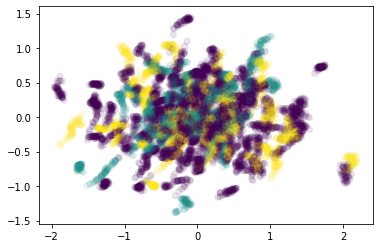

In [46]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(col_pca_values[:,0], col_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

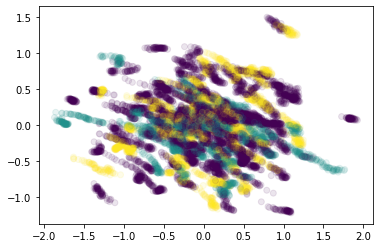

In [47]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(hemo_pca_values[:,0], hemo_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

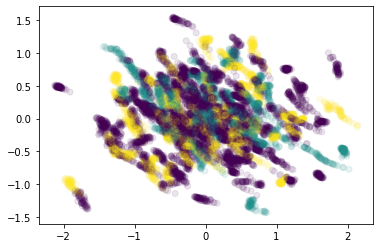

In [48]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(hdl_pca_values[:,0], hdl_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

In [49]:
col_pred_bottle=col_model_bottle.predict(X)
hemo_pred_bottle=hemo_model_bottle.predict(X)
hdl_pred_bottle=hdl_model_bottle.predict(X)
df["hdl_cholesterol_human"]

0          ok
1          ok
2          ok
3         low
4          ok
         ... 
13135    high
13136      ok
13137      ok
13138      ok
13139    high
Name: hdl_cholesterol_human, Length: 13140, dtype: object

In [50]:
df.head(0)

Empty DataFrame
Columns: [Reading_ID, absorbance0, absorbance1, absorbance2, absorbance3, absorbance4, absorbance5, absorbance6, absorbance7, absorbance8, absorbance9, absorbance10, absorbance11, absorbance12, absorbance13, absorbance14, absorbance15, absorbance16, absorbance17, absorbance18, absorbance19, absorbance20, absorbance21, absorbance22, absorbance23, absorbance24, absorbance25, absorbance26, absorbance27, absorbance28, absorbance29, absorbance30, absorbance31, absorbance32, absorbance33, absorbance34, absorbance35, absorbance36, absorbance37, absorbance38, absorbance39, absorbance40, absorbance41, absorbance42, absorbance43, absorbance44, absorbance45, absorbance46, absorbance47, absorbance48, absorbance49, absorbance50, absorbance51, absorbance52, absorbance53, absorbance54, absorbance55, absorbance56, absorbance57, absorbance58, absorbance59, absorbance60, absorbance61, absorbance62, absorbance63, absorbance64, absorbance65, absorbance66, absorbance67, absorbance68, absorbance69, absorbance70, absorbance71, absorbance72, absorbance73, absorbance74, absorbance75, absorbance76, absorbance77, absorbance78, absorbance79, absorbance80, absorbance81, absorbance82, absorbance83, absorbance84, absorbance85, absorbance86, absorbance87, absorbance88, absorbance89, absorbance90, absorbance91, absorbance92, absorbance93, absorbance94, absorbance95, absorbance96, absorbance97, absorbance98, ...]
Index: []

[0 rows x 176 columns]

In [80]:
# def a search matrix
def create_search_list(pred,df,str_index):
    out=[]
    for i,vec in enumerate(pred):
        out.append([vec,df[str_index].values[i]])
    return(out)
    
    

In [124]:
col_search_list=create_search_list(col_pred_bottle,df,"cholesterol_ldl_human")
hemo_search_list=create_search_list(hemo_pred_bottle,df,"hemoglobin(hgb)_human")

hdl_search_list=create_search_list(hdl_pred_bottle,df,"hdl_cholesterol_human")

In [125]:
col_search_list[0:8]

[[array([ 1.0023874 , -0.17152926,  0.7807273 , -0.3064185 ,  0.8985935 ,
         -0.2756584 ,  0.2670869 ,  1.0870309 ,  0.8677122 ], dtype=float32),
  'ok'],
 [array([ 1.507718  , -0.126146  ,  1.2329315 , -0.30984885,  1.1060677 ,
         -0.11846285,  0.53900707,  1.2220757 ,  0.79188347], dtype=float32),
  'high'],
 [array([ 1.4797244 , -0.13749507,  1.0470641 , -0.05418213,  0.6311482 ,
         -0.11460508,  0.60337514,  1.0295019 ,  0.90562814], dtype=float32),
  'high'],
 [array([ 1.2184584 , -0.10153126,  0.62347853, -0.34787345,  0.6755314 ,
         -0.29817125,  0.49377733,  1.1667781 ,  1.3839679 ], dtype=float32),
  'high'],
 [array([ 1.2081895 , -0.3171554 ,  1.0326277 , -0.14286268,  0.8144701 ,
         -0.33406392,  0.3450993 ,  1.0061659 ,  1.967993  ], dtype=float32),
  'high'],
 [array([ 1.4925443 , -0.38200963,  1.741494  , -0.44272128,  1.6574074 ,
         -0.11864759,  0.53931135,  1.783843  ,  1.2375283 ], dtype=float32),
  'ok'],
 [array([ 0.31410152, -0.2

In [126]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))


In [127]:
# calculate a cosine similarity between items im col_search_list
item1=col_search_list[5][0]
item2=col_search_list[7][0]

print(cosine_similarity(item1,item2))

0.92380166


In [215]:
def generate_similarity(it1,sim_table):
    out=[]
    for it2 in sim_table:
        
        diff=cosine_similarity(it1,it2[0])
        if 1-diff<0.002:
            
            out.append(it2[1])
    return(out)

In [216]:
simgent=generate_similarity(item1,col_search_list)

In [217]:
def statistic(a):
    c=list(set(a))
    #print(c)
    out={}
    for i in c:
        out[i]=a.count(i)
    return(out)

In [218]:
def find_max(dict):
    max=0
    sum=0
    outkey=""
    for key in dict.keys():
        akt=dict[key]
        sum+=akt
        if max<akt:
            max=akt
            outkey=key
    return outkey,max

In [219]:
result,_=find_max(statistic(simgent))
result

'ok'

### ----

In [220]:
import numpy as np
col_argm=np.argmax(col_pred,axis=1)
hemo_argm=np.argmax(hemo_pred,axis=1)
hdl_argm=np.argmax(hdl_pred,axis=1)




In [221]:
def calc_status(pred,dfcolumn):
    i=0
    for index,element in enumerate(pred):

        if element != dfcolumn.iloc[index]:
            #print(f"{index}")
            i +=1
    print(f"{i} hibás, {i/len(pred)*100} % hiba")        

In [222]:
# submission generation
!rm "./Test.csv"

In [223]:
!wget https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv

--2021-11-30 22:47:04--  https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv [following]
--2021-11-30 22:47:04--  https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10299206 (9,8M) [text/plain]
Saving to: ‘Test.csv’

Test.csv            100%[===================>]   9,82M  10,1MB/s    in 1,0s    

2021-11-30 22:47:05 (10,1 MB/s) - ‘Test.csv’ saved

In [224]:
test_df=pd.read_csv("./Test.csv")
test_df.head()

test_df['hdl_cholesterol_human']=0
test_df["hemoglobin(hgb)_human"]=0
test_df["cholesterol_ldl_human"]=0

In [225]:
test_transform=minmax.transform(test_df.iloc[:,1:])

In [226]:
X_test=test_transform[:,:-3]

In [227]:
col_pred_test_bottle=col_model_bottle.predict(X_test)
hemo_pred_test_bottle=hemo_model_bottle.predict(X_test)
hdl_pred_test_bottle=hdl_model_bottle.predict(X_test)

### a predikalt értékeket a search_list -hez kell hasonlítani

In [228]:
import numpy as np


In [229]:
col_predicted_test=[]
hemo_predicted_test=[]
hdl_predicted_test=[]

In [230]:
col_result=[]
for test_i in col_pred_test_bottle:
    o1=generate_similarity( test_i, col_search_list)
    result,_=find_max(statistic(o1))
    if result=="":
        result="NaN"
    print(result,end=",")
    col_result.append(result)

NaN,ok,NaN,NaN,NaN,ok,ok,NaN,low,high,NaN,NaN,NaN,NaN,high,ok,NaN,NaN,high,ok,ok,ok,ok,NaN,NaN,high,NaN,ok,ok,NaN,high,high,high,NaN,NaN,ok,high,NaN,NaN,ok,NaN,NaN,ok,ok,NaN,high,NaN,NaN,ok,high,NaN,NaN,high,NaN,ok,ok,high,NaN,high,high,NaN,ok,NaN,NaN,NaN,NaN,ok,high,ok,NaN,high,ok,NaN,ok,ok,NaN,NaN,NaN,NaN,NaN,ok,low,high,NaN,NaN,high,ok,ok,ok,NaN,high,NaN,ok,ok,NaN,ok,NaN,ok,NaN,NaN,ok,ok,NaN,NaN,NaN,NaN,ok,ok,NaN,NaN,NaN,ok,NaN,ok,high,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,high,high,high,ok,NaN,ok,NaN,NaN,NaN,high,ok,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,high,NaN,ok,ok,NaN,ok,high,high,ok,ok,NaN,NaN,high,NaN,NaN,ok,high,NaN,NaN,high,ok,ok,NaN,NaN,high,ok,high,ok,NaN,ok,high,low,NaN,NaN,high,NaN,high,high,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,high,NaN,ok,ok,NaN,NaN,high,NaN,NaN,NaN,high,NaN,high,high,NaN,high,ok,ok,NaN,NaN,NaN,ok,high,NaN,ok,ok,NaN,NaN,high,NaN,NaN,ok,NaN,NaN,NaN,high,NaN,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,ok,high,NaN,NaN,high,NaN,high,ok,high,NaN,ok,NaN,NaN,high,NaN,ok,NaN,high,high,NaN,ok,N

In [231]:
hemo_result=[]
for test_i in hemo_pred_test_bottle:
    o1=generate_similarity( test_i, hemo_search_list)
    result,_=find_max(statistic(o1))
    if result=="":
        result="NaN"
    print(result,end=",")
    hemo_result.append(result)

NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,ok,NaN,NaN,ok,ok,NaN,NaN,ok,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,ok,NaN,low,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,ok,low,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,ok,NaN,ok,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,ok,NaN,ok,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,ok,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,low,NaN,ok,NaN,high,NaN,NaN,NaN,NaN,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [232]:
hdl_result=[]
for test_i in hdl_pred_test_bottle:
    o1=generate_similarity( test_i, hdl_search_list)
    result,_=find_max(statistic(o1))
    if result=="":
        result="NaN"
    print(result,end=",")
    hdl_result.append(result)

NaN,ok,NaN,NaN,ok,ok,ok,NaN,ok,NaN,NaN,NaN,NaN,NaN,low,low,NaN,NaN,ok,ok,ok,NaN,ok,NaN,NaN,high,NaN,ok,ok,NaN,ok,low,ok,NaN,NaN,ok,ok,NaN,NaN,ok,NaN,NaN,ok,low,NaN,low,NaN,NaN,ok,high,NaN,ok,ok,NaN,high,ok,ok,NaN,high,ok,NaN,ok,ok,ok,NaN,ok,ok,ok,ok,NaN,low,low,NaN,ok,ok,low,NaN,high,ok,ok,high,high,high,NaN,ok,ok,low,ok,NaN,NaN,ok,NaN,ok,ok,NaN,high,NaN,ok,NaN,high,ok,NaN,NaN,NaN,NaN,NaN,ok,ok,NaN,ok,NaN,ok,NaN,ok,NaN,ok,NaN,high,NaN,NaN,NaN,NaN,low,ok,NaN,low,ok,ok,ok,NaN,NaN,ok,NaN,ok,NaN,NaN,NaN,NaN,ok,NaN,high,NaN,ok,NaN,ok,ok,NaN,ok,ok,ok,ok,NaN,NaN,ok,ok,NaN,NaN,ok,ok,NaN,high,low,ok,ok,NaN,NaN,ok,ok,low,ok,NaN,ok,ok,ok,ok,NaN,ok,ok,low,ok,low,NaN,NaN,ok,NaN,ok,low,NaN,ok,NaN,ok,NaN,ok,NaN,low,NaN,ok,high,high,NaN,ok,ok,NaN,ok,ok,ok,ok,high,high,ok,ok,NaN,low,ok,NaN,NaN,NaN,NaN,NaN,ok,NaN,NaN,NaN,ok,NaN,NaN,high,NaN,NaN,NaN,NaN,high,NaN,ok,low,NaN,NaN,low,NaN,ok,NaN,ok,NaN,ok,NaN,NaN,ok,NaN,ok,ok,ok,ok,ok,ok,NaN,NaN,high,NaN,ok,NaN,NaN,ok,NaN,high,NaN,low,ok,NaN,ok,ok,ok,NaN,ok,

In [233]:
outdf=pd.DataFrame()
outdf["Reading_ID"]=test_df["Reading_ID"]
outdf["hemoglobin(hgb)_human"]=hemo_result
outdf["cholesterol_ldl_human"]=col_result
outdf["hdl_cholesterol_human"]=hdl_result

outdf.set_index("Reading_ID",inplace=True)

In [234]:
outdf.head(33)

hemoglobin(hgb)_human cholesterol_ldl_human hdl_cholesterol_human
Reading_ID                                                                   
ID_37BEI22R                   NaN                   NaN                   NaN
ID_4W85V5DV                   NaN                    ok                    ok
ID_L4YR3NDY                   NaN                   NaN                   NaN
ID_U88E3SQ6                   NaN                   NaN                   NaN
ID_NW7Z3XU7                   NaN                   NaN                    ok
ID_W3SBFMVX                   NaN                    ok                    ok
ID_27P6YL52                    ok                    ok                    ok
ID_6VJ41WZC                   NaN                   NaN                   NaN
ID_S0ISRB3K                   NaN                   low                    ok
ID_T15C0RM6                   NaN                  high                   NaN
ID_59OU0Z4D                   NaN                   NaN                   NaN
ID_03NACR1R                   NaN                   NaN                   NaN
ID_R3NIN1EO                   NaN                   NaN                   NaN
ID_P74O71QB                   NaN                   NaN                   NaN
ID_1C17VQK0                    ok                  high                   low
ID_CKNMMKIG                    ok                    ok                   low
ID_UDLN7D0Z                   NaN                   NaN                   NaN
ID_HWU1M3UO                   NaN                   NaN                   NaN
ID_0PVFMGRP                    ok                  high                    ok
ID_YCMXOICB                    ok                    ok                    ok
ID_UGH0JEOZ                   NaN                    ok                    ok
ID_C59VEQX7                   NaN                    ok                   NaN
ID_QCHM1T4U                    ok                    ok                    ok
ID_HNIMEJJG                   NaN                   NaN                   NaN
ID_BTDHLWHL                   NaN                   NaN                   NaN
ID_2WBNSMFL                    ok                  high                  high
ID_IOQPIXZQ                   NaN                   NaN                   NaN
ID_CFFP5WI7                    ok                    ok                    ok
ID_I7TOPNV3                   NaN                    ok                    ok
ID_ZKLBPEKY                   NaN                   NaN                   NaN
ID_2JQ25RTV                    ok                  high                    ok
ID_PPYLL2VE                   NaN                  high                   low
ID_TXBIUA4Z                    ok                  high                    ok

In [235]:
!rm SampleSubmission.csv
!wget https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv

--2021-11-30 23:04:11--  https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv [following]
--2021-11-30 23:04:11--  https://raw.githubusercontent.com/sipocz/Blood/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384318 (375K) [text/plain]
Saving to: ‘SampleSubmission.csv’

SampleSubmission.cs 100%[===================>] 375,31K  --.-KB/s    in 0,1s    

2021

In [236]:
submission_df=pd.read_csv("./SampleSubmission.csv")

In [237]:
for i in submission_df.index:
    #print(i)
    indexer=submission_df.loc[i,"Reading_ID"]

    splitter=indexer.split("_",2)
    out_index=splitter[0]+"_"+splitter[1]
    col_index=splitter[2]
    #print(out_index)
    result=outdf.loc[out_index][col_index]
    submission_df.iloc[i,1]=result

In [238]:
submission_df.set_index("Reading_ID", inplace=True)

In [239]:
def create_submission_name(project):
    from datetime  import datetime
    strdate=datetime.now().strftime("%Y%m%d_%H%M%S")
    out=project+"_"+"submission"+"_"+strdate+".csv"
    return(out)

In [240]:
submission_fname=create_submission_name("BloodAI")

In [241]:
submission_fname

'BloodAI_submission_20211130_230422.csv'

In [242]:
submission_df.to_csv(submission_fname,index=True)

In [243]:
!head $submission_fname

Reading_ID,target
ID_00902R9H_hdl_cholesterol_human,NaN
ID_00902R9H_hemoglobin(hgb)_human,NaN
ID_00902R9H_cholesterol_ldl_human,NaN
ID_00FQS7AO_hdl_cholesterol_human,high
ID_00FQS7AO_hemoglobin(hgb)_human,NaN
ID_00FQS7AO_cholesterol_ldl_human,NaN
ID_00QJTIBO_hdl_cholesterol_human,NaN
ID_00QJTIBO_hemoglobin(hgb)_human,NaN
ID_00QJTIBO_cholesterol_ldl_human,NaN
